In [18]:
#Importing the libraries for data preprocessing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Reading the data
train_data = pd.read_csv("Train_v2.csv")
test_data = pd.read_csv("Test_v2.csv")

In [20]:
train_data.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [21]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [23]:
#Check on columns available in train_data but absent in test_data
#This helps to identify what we are predicting
for cols in train_data.columns:
    if cols not in test_data.columns:
        print(cols)

bank_account


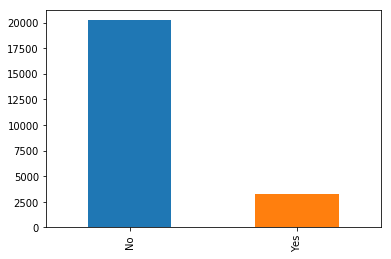

In [24]:
#checking how our target column data is distributed
#we get most of the data the answer is 'NO'
#Note here we are using the plot method from pandas for our visulization
train_data.bank_account.value_counts().plot(kind='bar') 


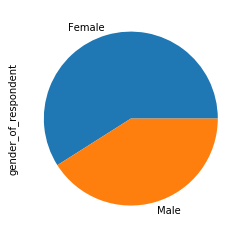

In [25]:
train_data.gender_of_respondent.value_counts().plot(kind='pie')

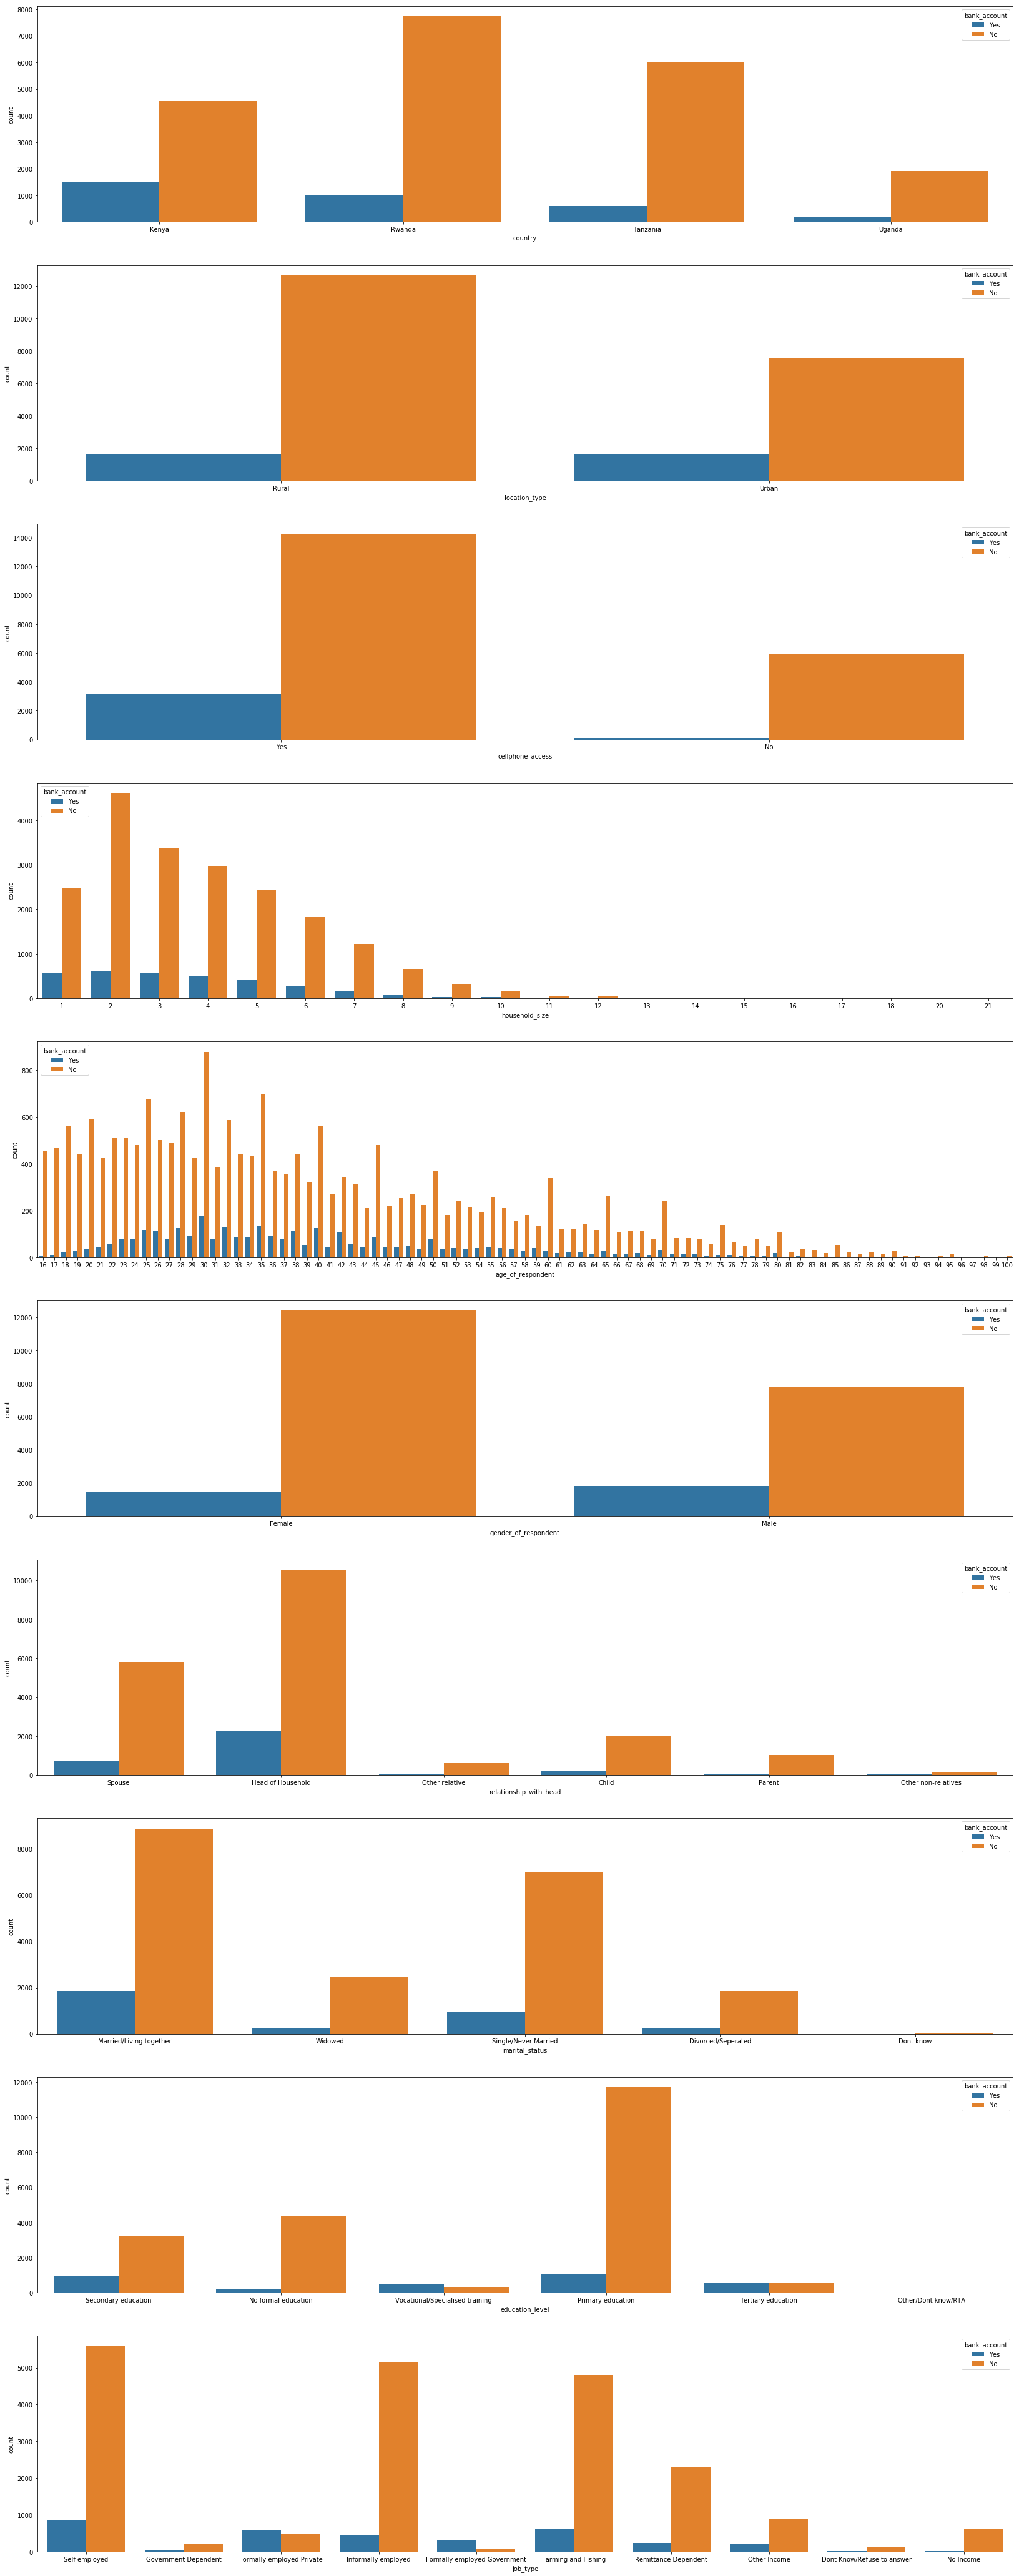

In [26]:
#checking the target distribution with various input features
#here we use seaborn to draw subplots
#these subplots show the reltionship with our target column
#hue sets the color
f,axes=plt.subplots(10,1,figsize=[28,75])
sns.countplot('country',hue='bank_account',data=train_data,ax=axes[0])
sns.countplot('location_type',hue='bank_account',data=train_data,ax=axes[1])
sns.countplot('cellphone_access',hue='bank_account',data=train_data,ax=axes[2])
sns.countplot('household_size',hue='bank_account',data=train_data,ax=axes[3])
sns.countplot('age_of_respondent',hue='bank_account',data=train_data,ax=axes[4])
sns.countplot('gender_of_respondent',hue='bank_account',data=train_data,ax=axes[5])
sns.countplot('relationship_with_head',hue='bank_account',data=train_data,ax=axes[6])
sns.countplot('marital_status',hue='bank_account',data=train_data,ax=axes[7])
sns.countplot('education_level',hue='bank_account',data=train_data,ax=axes[8])
sns.countplot('job_type',hue='bank_account',data=train_data,ax=axes[9])

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [28]:
#converting categorical features to numerical features
#algorithms cant work with text data thus we have to covert them to numbers
#there are two ways of encoding,label encoding and one hot encoding
#we have to encode both our traning and test data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for column in train_data.columns.drop(['country','uniqueid','year','household_size','age_of_respondent']):
    train_data[column]=le.fit_transform(train_data[column])

In [29]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,0,3,2,5


In [30]:
#selecting our features and target data
X_train=train_data.drop(['bank_account','uniqueid','country'],axis=1)
Y_train=train_data['bank_account']

X_test=test_data.drop(['uniqueid','country'],axis=1)

In [31]:
for column in test_data.columns.drop(['country',"uniqueid",'year','age_of_respondent','household_size']):
    test_data[column]=le.fit_transform(test_data[column])

In [32]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,1,2,3,2
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,1,2,5,3
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,4,2,0,8
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,1,2,2,8
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,0,3,3,8


In [33]:
#data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [35]:
#Getting model accuracy
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]
%time model.fit(X_train, Y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.702787	validation_0-error:0.141089	validation_1-auc:0.690959	validation_1-error:0.138122
[1]	validation_0-auc:0.814094	validation_0-error:0.13169	validation_1-auc:0.817374	validation_1-error:0.132597
[2]	validation_0-auc:0.819521	validation_0-error:0.140522	validation_1-auc:0.817521	validation_1-error:0.137272
[3]	validation_0-auc:0.832184	validation_0-error:0.138019	validation_1-auc:0.828195	validation_1-error:0.135147
[4]	validation_0-auc:0.837569	validation_0-error:0.139483	validation_1-auc:0.836159	validation_1-error:0.135572
[5]	validation_0-auc:0.84319	validation_0-error:0.134854	validation_1-auc:0.843721	validation_1-error:0.132172
[6]	validation_0-auc:0.84556	validation_0-error:0.131406	validation_1-auc:0.844115	validation_1-error:0.128772
[7]	validation_0-auc:0.847533	validation_0-error:0.13646	validation_1-auc:0.846606	validation_1-error:0.133022
[8]	validation_0-auc:0.844659	validation_0-error:0.139153	validation_1-auc:0.843784	validation_1-error:0.135

[73]	validation_0-auc:0.847802	validation_0-error:0.12895	validation_1-auc:0.845122	validation_1-error:0.129622
[74]	validation_0-auc:0.847764	validation_0-error:0.129706	validation_1-auc:0.844904	validation_1-error:0.130047
[75]	validation_0-auc:0.847509	validation_0-error:0.129753	validation_1-auc:0.844479	validation_1-error:0.130047
[76]	validation_0-auc:0.847523	validation_0-error:0.130178	validation_1-auc:0.844855	validation_1-error:0.130047
[77]	validation_0-auc:0.847391	validation_0-error:0.1298	validation_1-auc:0.844952	validation_1-error:0.130047
[78]	validation_0-auc:0.847402	validation_0-error:0.129233	validation_1-auc:0.844954	validation_1-error:0.130047
[79]	validation_0-auc:0.8475	validation_0-error:0.128808	validation_1-auc:0.845365	validation_1-error:0.127497
[80]	validation_0-auc:0.847649	validation_0-error:0.128478	validation_1-auc:0.84567	validation_1-error:0.127072
[81]	validation_0-auc:0.847711	validation_0-error:0.128147	validation_1-auc:0.845867	validation_1-erro

[146]	validation_0-auc:0.849363	validation_0-error:0.123235	validation_1-auc:0.847978	validation_1-error:0.122822
[147]	validation_0-auc:0.849359	validation_0-error:0.123046	validation_1-auc:0.847937	validation_1-error:0.122822
[148]	validation_0-auc:0.84974	validation_0-error:0.12281	validation_1-auc:0.848229	validation_1-error:0.122822
[149]	validation_0-auc:0.849729	validation_0-error:0.122573	validation_1-auc:0.848165	validation_1-error:0.122822
[150]	validation_0-auc:0.849799	validation_0-error:0.122337	validation_1-auc:0.848157	validation_1-error:0.122397
[151]	validation_0-auc:0.849663	validation_0-error:0.122148	validation_1-auc:0.848016	validation_1-error:0.122397
[152]	validation_0-auc:0.849622	validation_0-error:0.122243	validation_1-auc:0.848013	validation_1-error:0.121972
[153]	validation_0-auc:0.849705	validation_0-error:0.12229	validation_1-auc:0.848094	validation_1-error:0.121972
[154]	validation_0-auc:0.849791	validation_0-error:0.122007	validation_1-auc:0.848292	valid

[219]	validation_0-auc:0.853609	validation_0-error:0.118842	validation_1-auc:0.851158	validation_1-error:0.116872
[220]	validation_0-auc:0.853514	validation_0-error:0.118842	validation_1-auc:0.851051	validation_1-error:0.116872
[221]	validation_0-auc:0.853545	validation_0-error:0.118795	validation_1-auc:0.850968	validation_1-error:0.115597
[222]	validation_0-auc:0.853742	validation_0-error:0.118275	validation_1-auc:0.851122	validation_1-error:0.116022
[223]	validation_0-auc:0.853646	validation_0-error:0.118369	validation_1-auc:0.85118	validation_1-error:0.115597
[224]	validation_0-auc:0.853682	validation_0-error:0.118369	validation_1-auc:0.85107	validation_1-error:0.115597
[225]	validation_0-auc:0.853864	validation_0-error:0.118558	validation_1-auc:0.851562	validation_1-error:0.115597
[226]	validation_0-auc:0.853927	validation_0-error:0.118275	validation_1-auc:0.851544	validation_1-error:0.114747
[227]	validation_0-auc:0.853936	validation_0-error:0.118322	validation_1-auc:0.85167	valid

[292]	validation_0-auc:0.855162	validation_0-error:0.116952	validation_1-auc:0.85161	validation_1-error:0.114747
[293]	validation_0-auc:0.855205	validation_0-error:0.116952	validation_1-auc:0.851567	validation_1-error:0.113897
[294]	validation_0-auc:0.855215	validation_0-error:0.116858	validation_1-auc:0.851625	validation_1-error:0.113472
[295]	validation_0-auc:0.855172	validation_0-error:0.116858	validation_1-auc:0.851552	validation_1-error:0.113472
[296]	validation_0-auc:0.855174	validation_0-error:0.116905	validation_1-auc:0.851578	validation_1-error:0.113472
[297]	validation_0-auc:0.855111	validation_0-error:0.116905	validation_1-auc:0.85156	validation_1-error:0.113472
[298]	validation_0-auc:0.85512	validation_0-error:0.116905	validation_1-auc:0.851561	validation_1-error:0.113472
[299]	validation_0-auc:0.855115	validation_0-error:0.116905	validation_1-auc:0.85147	validation_1-error:0.113472
[300]	validation_0-auc:0.855134	validation_0-error:0.116905	validation_1-auc:0.85149	validat

[365]	validation_0-auc:0.856784	validation_0-error:0.116244	validation_1-auc:0.852154	validation_1-error:0.115597
[366]	validation_0-auc:0.856788	validation_0-error:0.116244	validation_1-auc:0.852149	validation_1-error:0.115597
[367]	validation_0-auc:0.856892	validation_0-error:0.116197	validation_1-auc:0.852255	validation_1-error:0.115597
[368]	validation_0-auc:0.856963	validation_0-error:0.116149	validation_1-auc:0.852208	validation_1-error:0.116022
[369]	validation_0-auc:0.856975	validation_0-error:0.116244	validation_1-auc:0.852139	validation_1-error:0.116022
[370]	validation_0-auc:0.856964	validation_0-error:0.116197	validation_1-auc:0.852145	validation_1-error:0.116022
[371]	validation_0-auc:0.856963	validation_0-error:0.116197	validation_1-auc:0.852019	validation_1-error:0.116022
[372]	validation_0-auc:0.857057	validation_0-error:0.116197	validation_1-auc:0.852146	validation_1-error:0.116022
[373]	validation_0-auc:0.857067	validation_0-error:0.116197	validation_1-auc:0.852178	va

[437]	validation_0-auc:0.85863	validation_0-error:0.115772	validation_1-auc:0.853313	validation_1-error:0.115172
[438]	validation_0-auc:0.858637	validation_0-error:0.115724	validation_1-auc:0.853326	validation_1-error:0.115172
[439]	validation_0-auc:0.858659	validation_0-error:0.115772	validation_1-auc:0.853346	validation_1-error:0.115172
[440]	validation_0-auc:0.858665	validation_0-error:0.115819	validation_1-auc:0.853357	validation_1-error:0.115597
[441]	validation_0-auc:0.858685	validation_0-error:0.115819	validation_1-auc:0.85341	validation_1-error:0.115597
[442]	validation_0-auc:0.858675	validation_0-error:0.115819	validation_1-auc:0.85337	validation_1-error:0.115597
[443]	validation_0-auc:0.858668	validation_0-error:0.115724	validation_1-auc:0.853361	validation_1-error:0.115597
[444]	validation_0-auc:0.858674	validation_0-error:0.115677	validation_1-auc:0.853337	validation_1-error:0.115597
[445]	validation_0-auc:0.858645	validation_0-error:0.11563	validation_1-auc:0.853326	valida

[510]	validation_0-auc:0.859586	validation_0-error:0.115063	validation_1-auc:0.85433	validation_1-error:0.116872
[511]	validation_0-auc:0.859607	validation_0-error:0.11511	validation_1-auc:0.85438	validation_1-error:0.116872
[512]	validation_0-auc:0.859627	validation_0-error:0.115063	validation_1-auc:0.854382	validation_1-error:0.116872
[513]	validation_0-auc:0.859763	validation_0-error:0.114969	validation_1-auc:0.854503	validation_1-error:0.116872
[514]	validation_0-auc:0.859774	validation_0-error:0.114969	validation_1-auc:0.854532	validation_1-error:0.116872
[515]	validation_0-auc:0.859881	validation_0-error:0.115016	validation_1-auc:0.854769	validation_1-error:0.116872
[516]	validation_0-auc:0.85989	validation_0-error:0.115016	validation_1-auc:0.854782	validation_1-error:0.116872
[517]	validation_0-auc:0.85994	validation_0-error:0.114921	validation_1-auc:0.854819	validation_1-error:0.116872
[518]	validation_0-auc:0.859987	validation_0-error:0.114921	validation_1-auc:0.854844	validat

[583]	validation_0-auc:0.860825	validation_0-error:0.114685	validation_1-auc:0.855411	validation_1-error:0.115597
[584]	validation_0-auc:0.860888	validation_0-error:0.114685	validation_1-auc:0.855362	validation_1-error:0.115597
[585]	validation_0-auc:0.86091	validation_0-error:0.11478	validation_1-auc:0.855359	validation_1-error:0.115597
[586]	validation_0-auc:0.860965	validation_0-error:0.11478	validation_1-auc:0.855485	validation_1-error:0.115597
[587]	validation_0-auc:0.860966	validation_0-error:0.11478	validation_1-auc:0.855512	validation_1-error:0.115597
[588]	validation_0-auc:0.86099	validation_0-error:0.114732	validation_1-auc:0.855498	validation_1-error:0.115597
[589]	validation_0-auc:0.860991	validation_0-error:0.114685	validation_1-auc:0.855518	validation_1-error:0.115597
[590]	validation_0-auc:0.861011	validation_0-error:0.114732	validation_1-auc:0.855486	validation_1-error:0.115597
[591]	validation_0-auc:0.861026	validation_0-error:0.114732	validation_1-auc:0.855476	validat

[656]	validation_0-auc:0.861255	validation_0-error:0.114496	validation_1-auc:0.855592	validation_1-error:0.114322
[657]	validation_0-auc:0.861286	validation_0-error:0.114496	validation_1-auc:0.855609	validation_1-error:0.114322
[658]	validation_0-auc:0.861296	validation_0-error:0.114496	validation_1-auc:0.855652	validation_1-error:0.113897
[659]	validation_0-auc:0.861308	validation_0-error:0.114496	validation_1-auc:0.855699	validation_1-error:0.113897
[660]	validation_0-auc:0.861308	validation_0-error:0.114496	validation_1-auc:0.855699	validation_1-error:0.113897
[661]	validation_0-auc:0.861298	validation_0-error:0.114496	validation_1-auc:0.855674	validation_1-error:0.113897
[662]	validation_0-auc:0.861294	validation_0-error:0.114449	validation_1-auc:0.85569	validation_1-error:0.113897
[663]	validation_0-auc:0.861313	validation_0-error:0.114449	validation_1-auc:0.855653	validation_1-error:0.113897
[664]	validation_0-auc:0.8613	validation_0-error:0.114449	validation_1-auc:0.855658	valid

[729]	validation_0-auc:0.861843	validation_0-error:0.114024	validation_1-auc:0.856058	validation_1-error:0.114322
[730]	validation_0-auc:0.861843	validation_0-error:0.114024	validation_1-auc:0.856058	validation_1-error:0.114322
[731]	validation_0-auc:0.861843	validation_0-error:0.114024	validation_1-auc:0.856058	validation_1-error:0.114322
[732]	validation_0-auc:0.861843	validation_0-error:0.114024	validation_1-auc:0.856058	validation_1-error:0.114322
[733]	validation_0-auc:0.861841	validation_0-error:0.11374	validation_1-auc:0.85607	validation_1-error:0.114322
[734]	validation_0-auc:0.86189	validation_0-error:0.113929	validation_1-auc:0.85609	validation_1-error:0.114322
[735]	validation_0-auc:0.861922	validation_0-error:0.113882	validation_1-auc:0.856108	validation_1-error:0.114322
[736]	validation_0-auc:0.861922	validation_0-error:0.113788	validation_1-auc:0.856106	validation_1-error:0.114322
[737]	validation_0-auc:0.861912	validation_0-error:0.11374	validation_1-auc:0.856105	validat

[802]	validation_0-auc:0.862391	validation_0-error:0.11341	validation_1-auc:0.856554	validation_1-error:0.114747
[803]	validation_0-auc:0.862391	validation_0-error:0.113457	validation_1-auc:0.856554	validation_1-error:0.114747
[804]	validation_0-auc:0.862391	validation_0-error:0.113457	validation_1-auc:0.856554	validation_1-error:0.114747
[805]	validation_0-auc:0.862395	validation_0-error:0.11341	validation_1-auc:0.8566	validation_1-error:0.114747
[806]	validation_0-auc:0.862397	validation_0-error:0.11341	validation_1-auc:0.856595	validation_1-error:0.114747
[807]	validation_0-auc:0.862397	validation_0-error:0.11341	validation_1-auc:0.856595	validation_1-error:0.114747
[808]	validation_0-auc:0.862397	validation_0-error:0.11341	validation_1-auc:0.856595	validation_1-error:0.114747
[809]	validation_0-auc:0.862397	validation_0-error:0.11341	validation_1-auc:0.856595	validation_1-error:0.114747
[810]	validation_0-auc:0.862397	validation_0-error:0.11341	validation_1-auc:0.856595	validation_

[875]	validation_0-auc:0.862811	validation_0-error:0.112843	validation_1-auc:0.856941	validation_1-error:0.114322
[876]	validation_0-auc:0.862811	validation_0-error:0.112843	validation_1-auc:0.856941	validation_1-error:0.114322
[877]	validation_0-auc:0.862811	validation_0-error:0.112843	validation_1-auc:0.856941	validation_1-error:0.114322
[878]	validation_0-auc:0.862811	validation_0-error:0.112843	validation_1-auc:0.856941	validation_1-error:0.114322
[879]	validation_0-auc:0.862836	validation_0-error:0.112843	validation_1-auc:0.856941	validation_1-error:0.114322
[880]	validation_0-auc:0.862921	validation_0-error:0.112843	validation_1-auc:0.85704	validation_1-error:0.114322
[881]	validation_0-auc:0.862921	validation_0-error:0.112843	validation_1-auc:0.85704	validation_1-error:0.114322
[882]	validation_0-auc:0.862919	validation_0-error:0.112843	validation_1-auc:0.857031	validation_1-error:0.114322
[883]	validation_0-auc:0.862919	validation_0-error:0.112843	validation_1-auc:0.857031	vali

[947]	validation_0-auc:0.863338	validation_0-error:0.112607	validation_1-auc:0.857583	validation_1-error:0.113897
[948]	validation_0-auc:0.863348	validation_0-error:0.112654	validation_1-auc:0.857566	validation_1-error:0.113897
[949]	validation_0-auc:0.863348	validation_0-error:0.112654	validation_1-auc:0.857566	validation_1-error:0.113897
[950]	validation_0-auc:0.863348	validation_0-error:0.112654	validation_1-auc:0.857566	validation_1-error:0.113897
[951]	validation_0-auc:0.863348	validation_0-error:0.112654	validation_1-auc:0.857566	validation_1-error:0.113897
[952]	validation_0-auc:0.863348	validation_0-error:0.112654	validation_1-auc:0.857566	validation_1-error:0.113897
[953]	validation_0-auc:0.863348	validation_0-error:0.112654	validation_1-auc:0.857566	validation_1-error:0.113897
[954]	validation_0-auc:0.863348	validation_0-error:0.112654	validation_1-auc:0.857566	validation_1-error:0.113897
[955]	validation_0-auc:0.863348	validation_0-error:0.112654	validation_1-auc:0.857566	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=10,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.8, verbosity=1)

In [38]:
#Importing xgboost
from xgboost import XGBClassifier
#fine tuning the model
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
model.fit(X_train, Y_train)
target = test_data.drop(['country','uniqueid'],axis=1)

test_data.bank_account = model.predict(target)
submissionfile= pd.DataFrame({'unique_id':test_data['uniqueid']+" x "+test_data['country'],'bank_account':test_data.bank_account})
submissionfile.to_csv("submissionfile7.csv", index=False)